In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [13]:

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
catfish_sales = pd.read_csv('../Datasets/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [14]:

catfish_sales.loc["1998-12-1"]['Total'] = 10000

Text(0, 0.5, 'Sales')

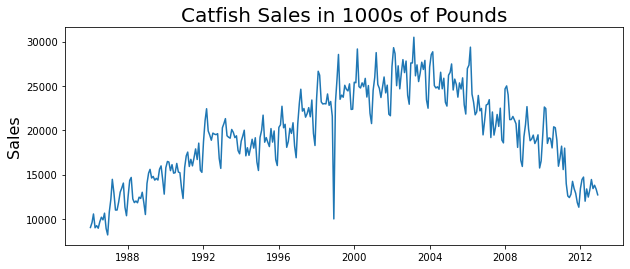

In [18]:
plt.figure(figsize=(10,4))
plt.plot(catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)


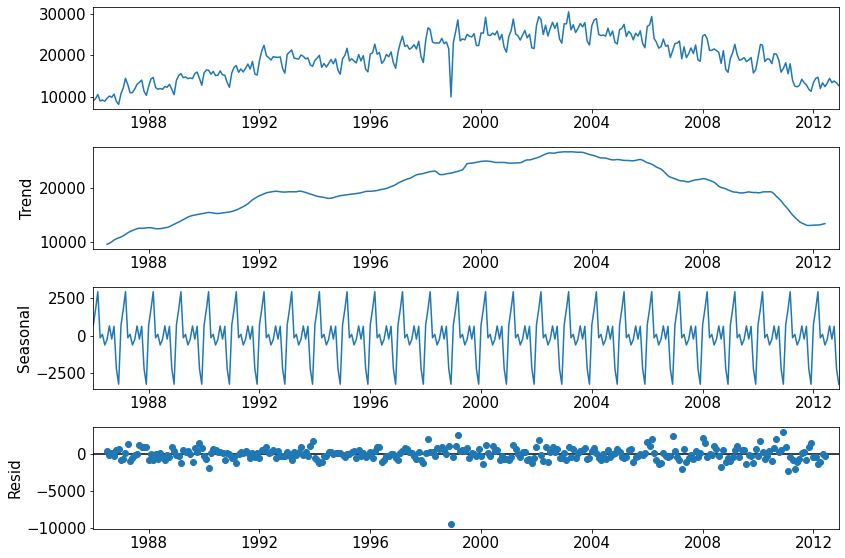

In [21]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(catfish_sales,model='additive')
fig = result.plot()

(array([  1.,   0.,   0.,   0.,   0.,   2.,  46., 189.,  65.,   9.]),
 array([-9522.05315171, -8265.97398504, -7009.89481838, -5753.81565171,
        -4497.73648504, -3241.65731838, -1985.57815171,  -729.49898504,
          526.58018162,  1782.65934829,  3038.73851496]),
 <BarContainer object of 10 artists>)

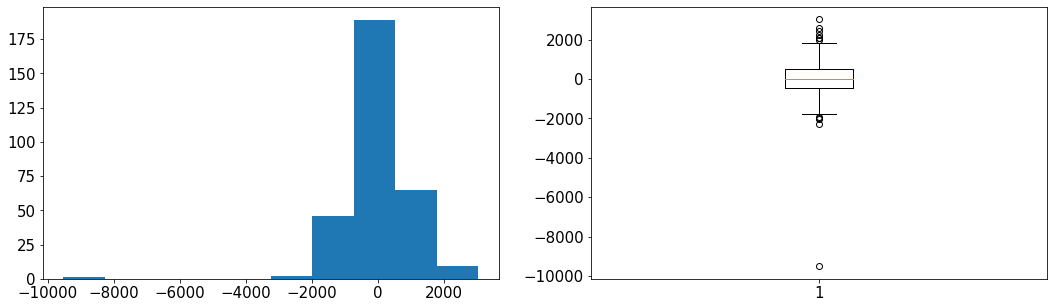

In [33]:
residuals = result.resid
fig, ax = plt.subplots(1,2,figsize = (18,5),)
ax[1].boxplot(residuals.dropna()) 
ax[0].hist(residuals.dropna())


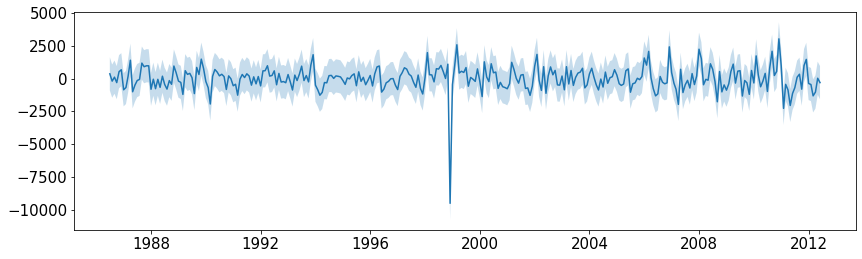

In [37]:
fig = plt.figure(figsize=(14,4))
MAD = residuals.mad()
plt.plot(residuals)
plt.fill_between(x=residuals.index,
                 y1=residuals - 2*MAD,
                 y2=residuals + 2*MAD,
                 alpha=0.25
                 )

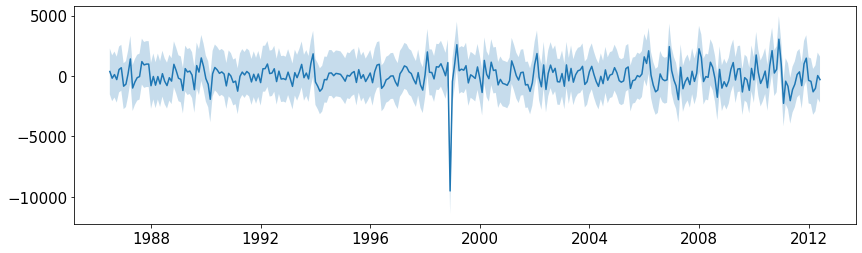

In [39]:
fig = plt.figure(figsize=(14,4))
sd = residuals.std()
plt.plot(residuals)
plt.fill_between(x=residuals.index,
                 y1=residuals - 2*sd,
                 y2=residuals + 2*sd,
                 alpha=0.25
                 )

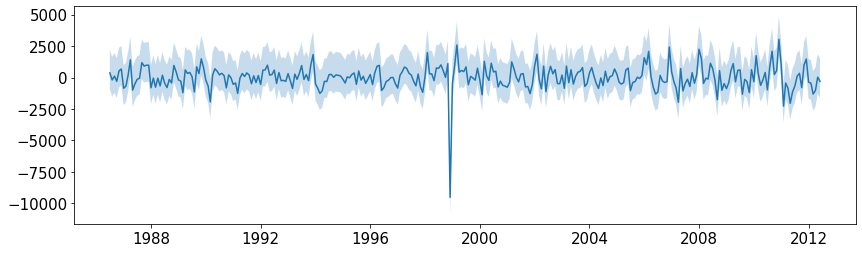

In [40]:
fig = plt.figure(figsize=(14,4))
q975 = residuals.quantile(.975)
q025 = residuals.quantile(.025)
plt.plot(residuals)
plt.fill_between(x=residuals.index,
                 y1=residuals + q025,
                 y2=residuals + q975,
                 alpha=0.25
                 )